<a href="https://colab.research.google.com/github/mona-baharlou/CiFar10_DeepLearning/blob/main/CiFar10_DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import numpy as np
from tensorflow import keras
from keras.constraints import max_norm
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization
from keras.utils import to_categorical
from keras.datasets import cifar10
import seaborn as sb
#from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt


In [91]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [92]:
x_train.shape
y_train.shape


(50000, 1)

In [93]:
#Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
x_train = x_train.astype('float32')
x_test= x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [94]:
#one_hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [95]:
class_num = y_test.shape[1]

Building the Model


In [96]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:], activation ='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation ='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation ='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(32, activation ='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(class_num , activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [98]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           33

 Total params: 205,546 (802.91 KB)

 Trainable params: 200,810 (784.41 KB)

 Non-trainable params: 4,736 (18.50 KB)

Training The Model


In [99]:
history = model.fit(x_train, y_train, validation_data= (x_test,y_test), epochs = 30, batch_size = 64 )

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.3536 - loss: 1.8225 - val_accuracy: 0.5400 - val_loss: 1.3107
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5732 - loss: 1.1934 - val_accuracy: 0.6584 - val_loss: 0.9760
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6471 - loss: 1.0090 - val_accuracy: 0.7330 - val_loss: 0.7749
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6791 - loss: 0.9090 - val_accuracy: 0.7186 - val_loss: 0.8159
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7051 - loss: 0.8449 - val_accuracy: 0.7405 - val_loss: 0.7384
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7204 - loss: 0.7991 - val_accuracy: 0.7433 - val_loss: 0.7501
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7287 - loss: 0.7761 - val_accuracy: 0.7686 - val_loss: 0.6651
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7431 - loss: 0.7349 - val_accurac

In [100]:
for key,val in history.history.items():
  print(key)

accuracy
loss
val_accuracy
val_loss


In [101]:
import pandas as pd

<Axes: >

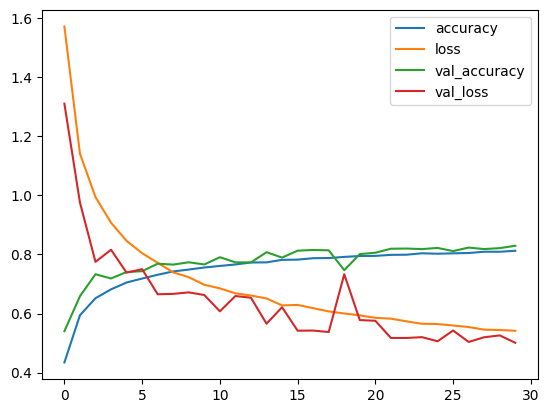

In [102]:
pd.DataFrame(history.history).plot()

In [103]:
model.save('CNN_CiFar10.keras')

In [104]:
model_new = load_model('CNN_CiFar10.keras')


In [105]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [106]:
model_new.predict(x_test[0:10])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


array([0.00743283, 0.00499466, 0.00389806, 0.7206602 , 0.00237837,
       0.14150508, 0.1121939 , 0.00220994, 0.00204945, 0.00267755],
      dtype=float32)

In [107]:
labels[3]

'cat'

In [108]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 900x900 with 0 Axes>

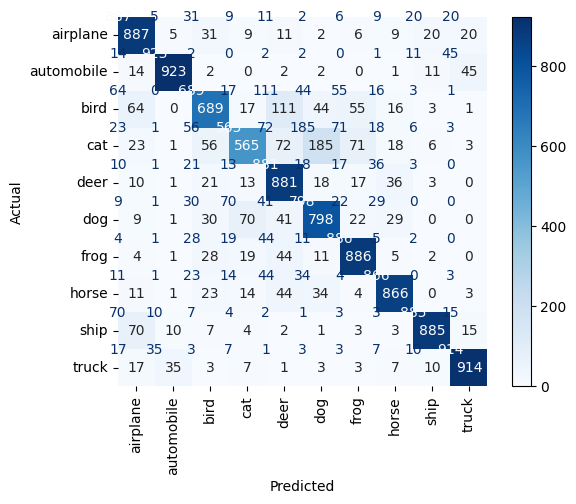

In [115]:
#Predicting test data
y_pred_probs = model.predict(x_test)
predictions = y_pred_probs.argmax(axis=1)

y_test_labels = y_test.argmax(axis=1)

#Creating confusion matrix
cm = confusion_matrix(y_test_labels, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

plt.figure(figsize=(9,9))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
sb.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt= 'd', annot= True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<class 'numpy.ndarray'> (10000, 10)
<class 'numpy.ndarray'> (10000,)


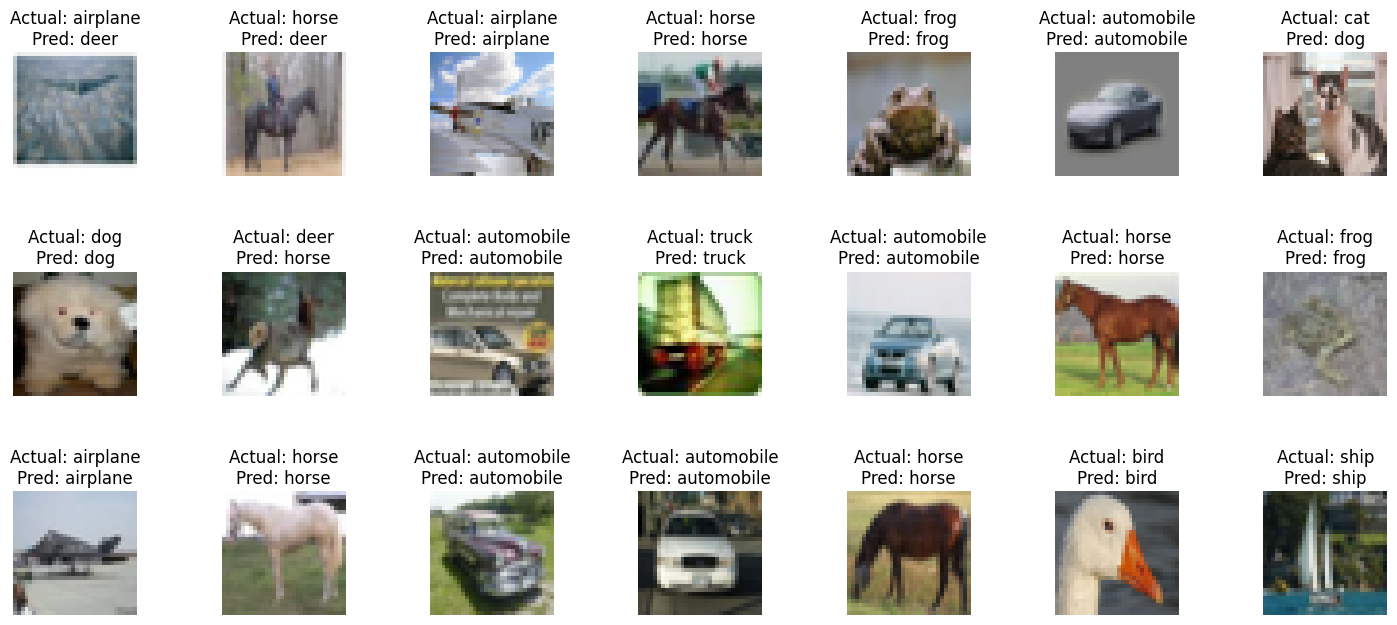

In [123]:
#print(type(y_test), y_test.shape)
#print(type(predictions), predictions.shape)

y_test = y_test.argmax(axis=1)

sample_indices = np.random.choice(len(x_test), 21, replace=False)

fig, axes = plt.subplots(3, 7, figsize=(15, 7))
fig.tight_layout(pad=3.0)

for i in range(3):
    for j in range(7):
        idx = sample_indices[i * 7 + j]

        axes[i, j].imshow(x_test[idx])
        axes[i, j].set_title('Actual: ' + labels[y_test[idx]] + '\nPred: ' + labels[predictions[idx]])
        axes[i, j].axis('off')

plt.show()